<a href="https://colab.research.google.com/github/HANISY/FastCampus-EXPORT-Data-Analysis/blob/main/EXPORT_MANUFACTURING_1%EC%B0%A8_%EC%9D%B4%EC%86%8C%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[EXPORT]**  
**┗ 기본편🎉**
---

## **🔒 [제조] 문제**
---
* **제시된 제조 데이터(Time Series, 시계열)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|datetime|시간|
|Accelerometer1RMS|진동 가속도1|
|Accelerometer2RMS|진동 가속도2|
|Current |전기모터 암페어(Ampere)|
|Pressure|워터 펌프 후 루프의 압력(Bar) |
|Temperature|엔진의 온도(섭씨 온도)|
|Thermocouple|순환 루프에서 유체의 온도(섭씨 온도)|
|Voltage|전기 모터의 전압(Volt)|
|RateRMS|루프 내부의 유체의 순환 유량(Liter/min)|
|anomaly|이상여부|
|changepoint|변경점 여부|

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive'

In [ ]:
import pandas as pd
df1 = pd.read_csv('example_1.csv', sep=";")
df1.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

In [ ]:
#1 Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력
df1.shape

(1063, 11)

In [ ]:
#2 Data type 확인 → 각 Column별 Data Type 출력
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             1063 non-null   object 
 1   Accelerometer1RMS    1063 non-null   float64
 2   Accelerometer2RMS    1063 non-null   float64
 3   Current              1063 non-null   float64
 4   Pressure             1063 non-null   float64
 5   Temperature          1063 non-null   float64
 6   Thermocouple         1063 non-null   float64
 7   Voltage              1063 non-null   float64
 8   Volume Flow RateRMS  1063 non-null   float64
 9   anomaly              1063 non-null   float64
 10  changepoint          1063 non-null   float64
dtypes: float64(10), object(1)
memory usage: 91.5+ KB


In [ ]:
#3 Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
df1.isnull().sum()

datetime               0
Accelerometer1RMS      0
Accelerometer2RMS      0
Current                0
Pressure               0
Temperature            0
Thermocouple           0
Voltage                0
Volume Flow RateRMS    0
anomaly                0
changepoint            0
dtype: int64

### Question 02

```
01번 문제에서 Read한 데이터를 활용하여, 다음 시각화를 진행하시오.

  (1) 전체 데이터의 개수에서 'anomaly'가 차지하는 비율은?
  
  (2) 'Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS'
  총 8개의 Column 대상으로 총 8개의 Trend 그래프를 시각화 하시오.
  (※ x = 'datetime', y= 각 Column)

  (3) 시각화만 Trend 그래프 위에 'anomaly'가 1인 데이터에 대해서 이상 포인트를 표시하시오.
  (※ Trend 그래프에서 이상 Point를 구별할 수 있는 방법이라면 자유롭게 표현 가능)

```

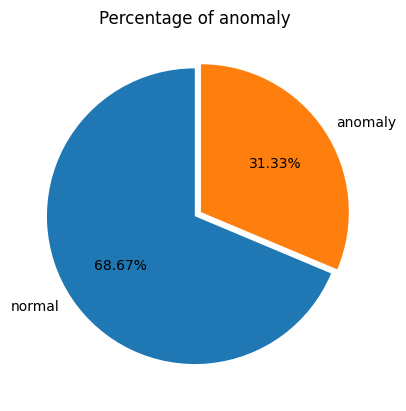

In [ ]:
#1 전체 데이터의 개수에서 'anomaly'가 차지하는 비율은?

import matplotlib.pyplot as plt

# anomaly에 존재하는 값에 대해서 카운트
df1['anomaly'].value_counts()

# 값에 대한 레이블 지정
pie1_labels = ["normal", "anomaly"]
pie1_values = df1['anomaly'].value_counts().values.tolist()

# 전체 데이터에서 anomaly가 차지하는 비율 표현
plt.pie(pie1_values, labels=pie1_labels, autopct='%.02f%%', startangle=90, explode=[0, 0.05])
plt.title('Percentage of anomaly')
plt.show()

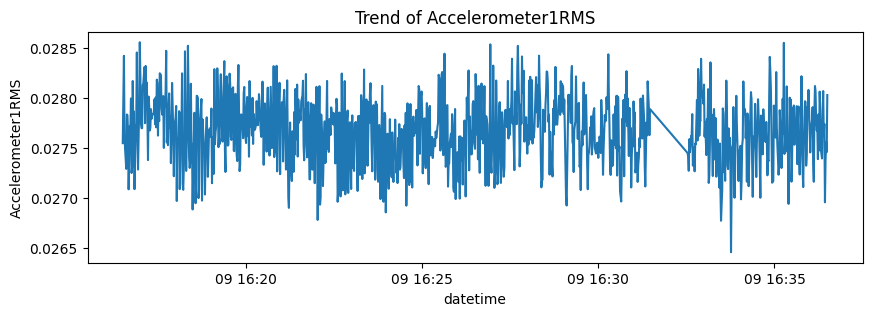

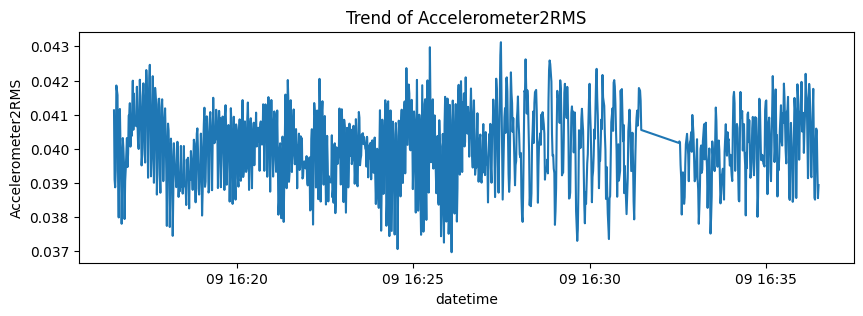

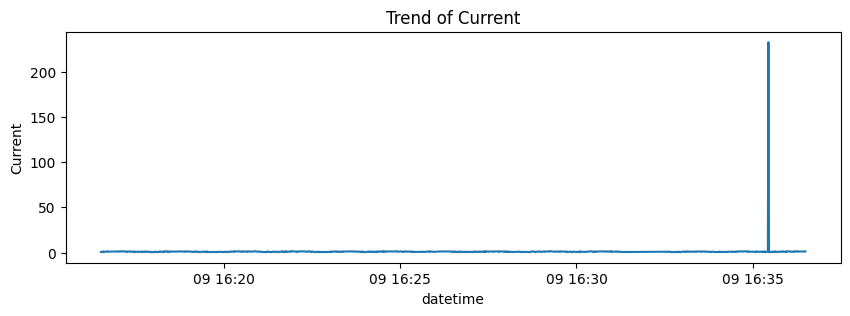

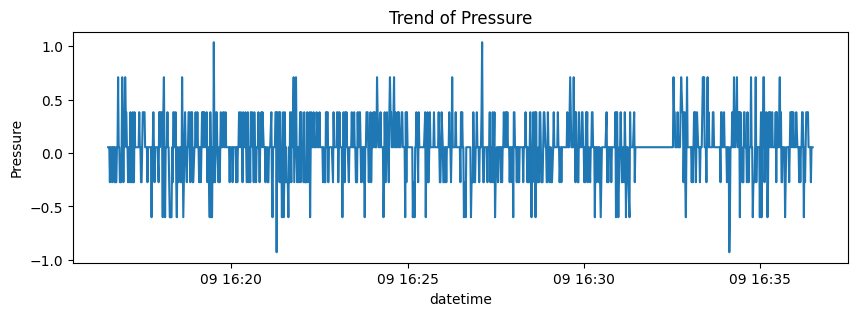

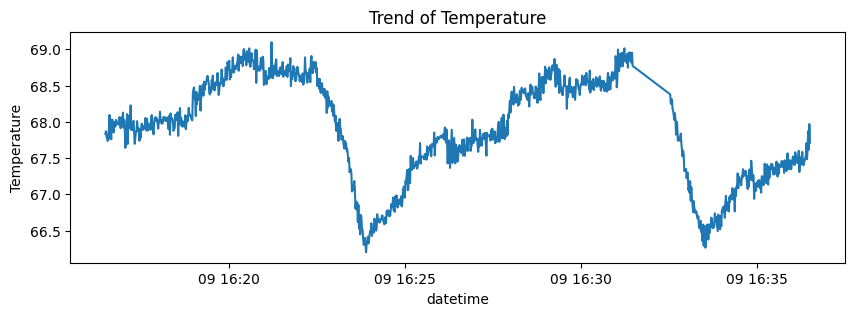

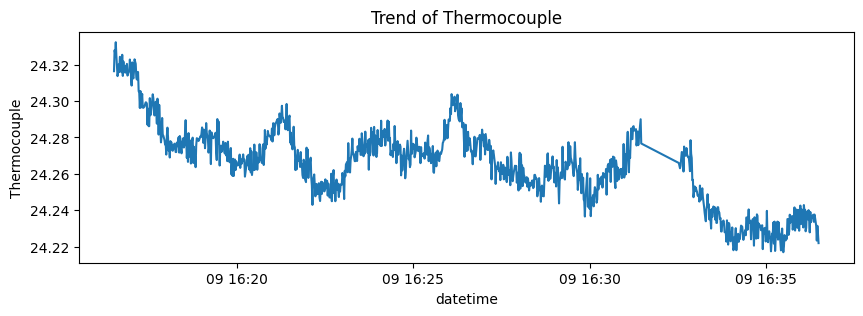

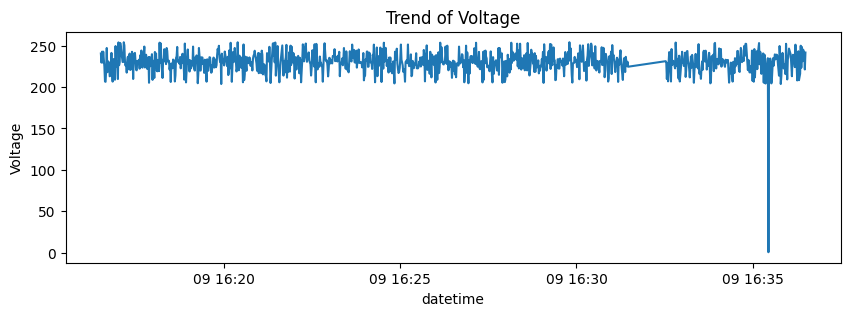

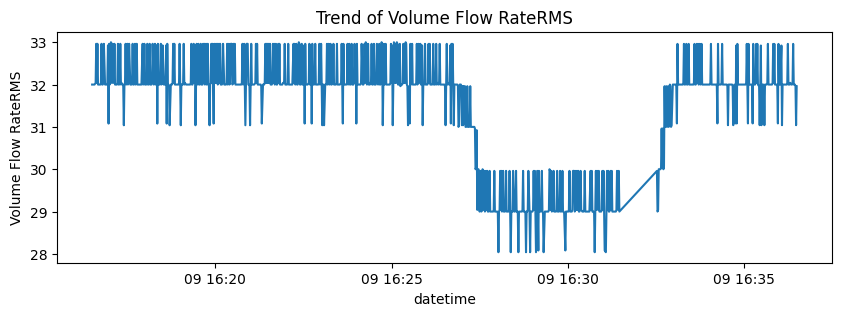

In [ ]:
#2 'Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS' 총 8개의 Column 대상으로 총 8개의 Trend 그래프를 시각화 하시오.(※ x = 'datetime', y= 각 Column)

# datetime 컬럼을 datetime 타입으로 변환
df1['datetime'] = pd.to_datetime(df1['datetime'])

# 대상 컬럼 리스트 지정
columns = ['Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS']

# 각 컬럼에 대한 시각화
for column in columns:
    plt.figure(figsize=(10, 3))
    plt.plot(df1['datetime'], df1[column])
    plt.title(f'Trend of {column}')
    plt.xlabel('datetime')
    plt.ylabel(column)
    plt.show()

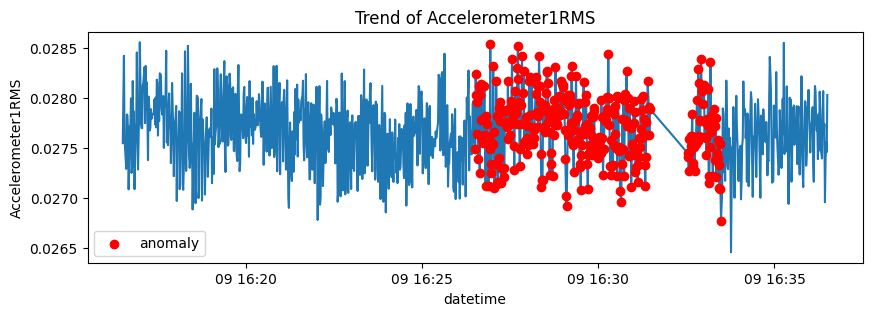

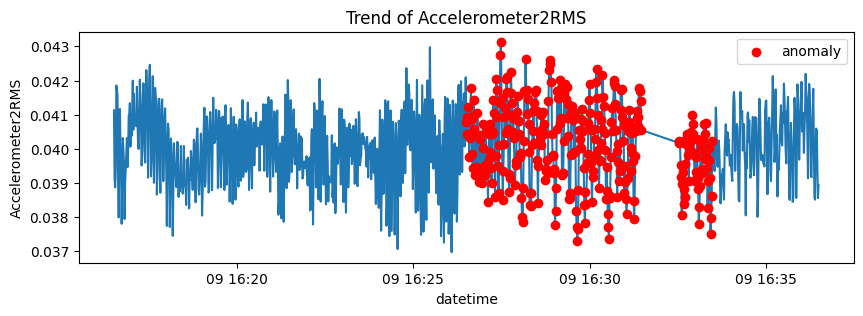

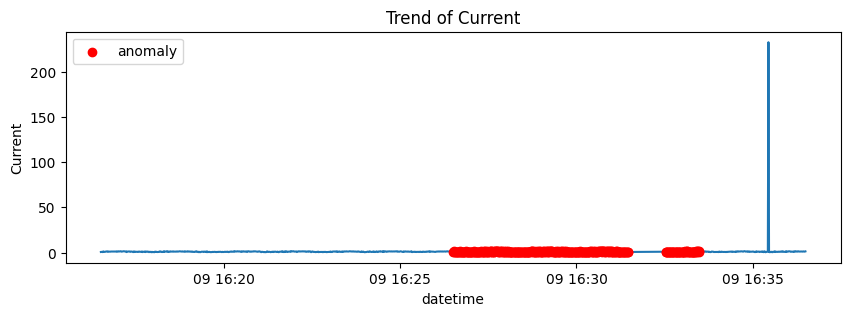

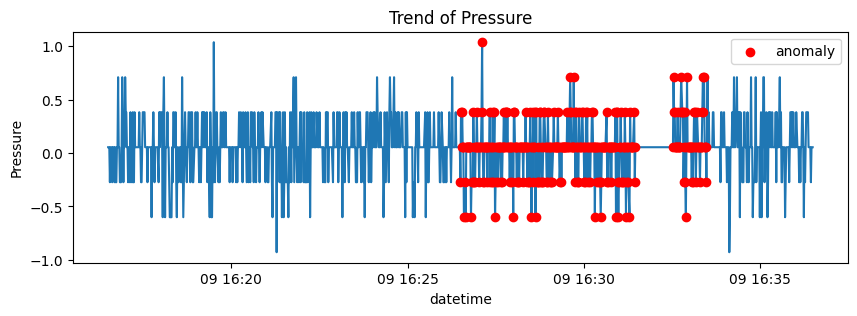

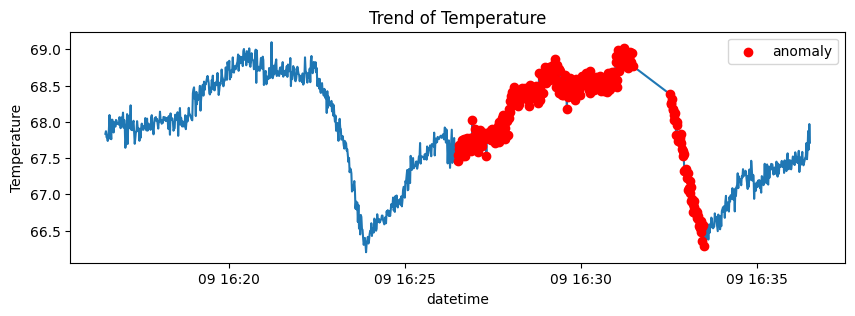

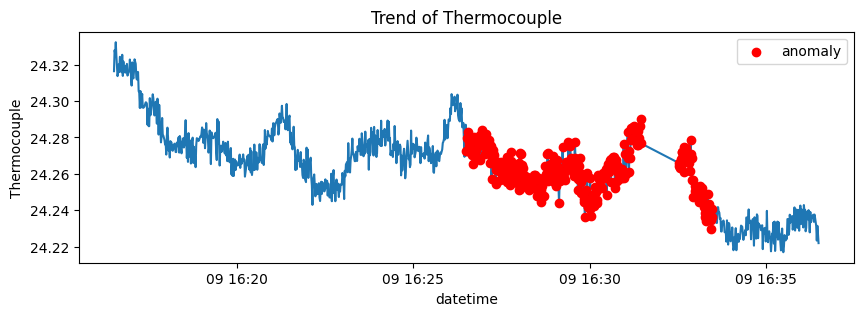

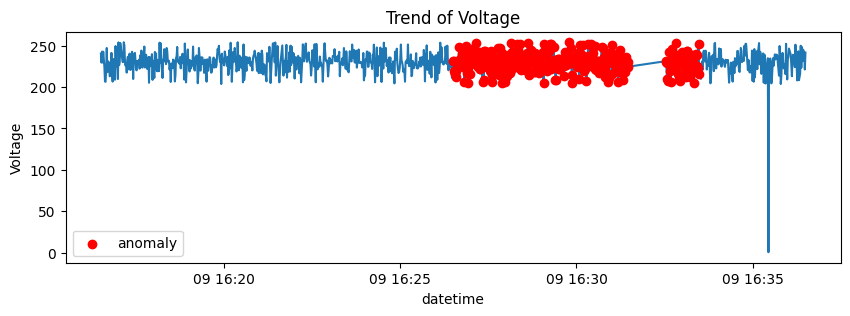

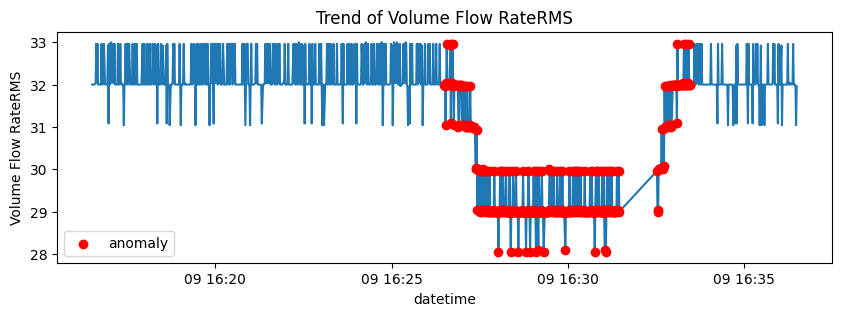

In [ ]:
#3 시각화만 Trend 그래프 위에 'anomaly'가 1인 데이터에 대해서 이상 포인트를 표시하시오.(※ Trend 그래프에서 이상 Point를 구별할 수 있는 방법이라면 자유롭게 표현 가능)

# 대상 컬럼 리스트
columns = ['Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS']

# 각 컬럼에 대한 시각화
for column in columns:
    plt.figure(figsize=(10, 3))
    plt.plot(df1['datetime'], df1[column], zorder = -1)
    plt.scatter(df1[df1['anomaly'] == 1]['datetime'], df1[df1['anomaly'] == 1][column], color = 'red', label = 'anomaly', zorder = 1)      #anomaly가 1인 데이터 이상 포인트 표시
    plt.legend()
    plt.title(f'Trend of {column}')
    plt.xlabel('datetime')
    plt.ylabel(column)
    plt.show()

#anomaly가 1인 데이터 이상 포인트 표시

### Question 03

```
'anomaly가 1인 이상 데이터와 정상 데이터의 다른 특성들이 어떤 것들이 있는지 자유롭게 추가 EDA를 진행하시오.

```

## **🔒 [금융] 문제**
---
* **제시된 금융 데이터(Non Time-Series)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|step|1step이 1시간인 시간 단위|
|type|온라인 거래유형|
|amount|거래 금액|
|nameOrig|거래 시작 고객|
|oldbalanceOrg|거래 전 잔액|
|newbalanceOrig|거래 후 잔액|
|nameDest|거래 수신 고객|
|oldbalanceDest|거래 전 수취인의 초기 잔액|
|newbalanceDest|거래 후 받는 사람의 새 잔액|
|isFraud|사기 거래|
|isFlaggedFraud|의심사기거래|


In [ ]:
df2 = pd.read_csv('example_2.csv')
df2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

In [ ]:
#1 Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력
df2.shape

(6362620, 11)

In [ ]:
#2 Data type 확인 → 각 Column별 Data Type 출력
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#3 Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
df2.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Question 02

```
01번 문제에서 Read한 데이터를 활용하여, 다음 지표들을 추출하시오.

  (1) 'isFraud' Column을 활용하여, 전체 사기율(%)을 계산하시오.

  (2) 'type'에 따른 사기율(%)을 계산하시오.

  (3) 사기거래와 사기거래가 아닌 거래의 amount의 분포를 비교하시오.
  (※ isFraud가 1인 데이터 1000개를 Sampling하고 isFraud가 0인 데이터를 1000개를 Sampling하여 시각화 할 것)

```

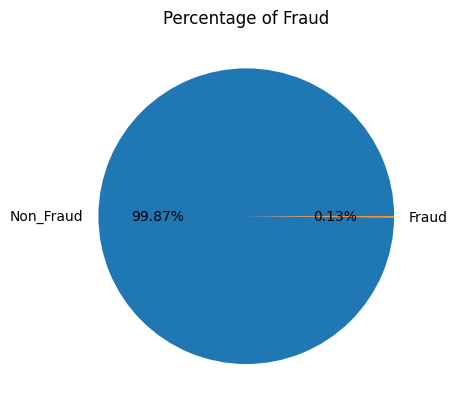

In [ ]:
#1 'isFraud' Column을 활용하여, 전체 사기율(%)을 계산하시오.

# isFraud값에 대해서 카운트
df2['isFraud'].value_counts()

# 값에 대한 레이블 지정
pie2_labels = ["Non_Fraud", "Fraud"]
pie2_values = df2['isFraud'].value_counts().values.tolist()

# 전체 데이터에서 anomaly가 차지하는 비율 표현
plt.pie(pie2_values, labels=pie2_labels, autopct='%.02f%%' )
plt.title('Percentage of Fraud')
plt.show()

In [ ]:
#2 'type'에 따른 사기율(%)을 계산하시오.

#type에 따른 사기율 그룹화
df2_type = df2.groupby('type')['isFraud'].mean()

#퍼센트(%)로 수치 표기
df2_type.map(lambda x: '{:.2%}'.format(x))

print(f"'type'에 따른 사기율(%)\n{df2_type.map(lambda x: '{:.2%}'.format(x))}")

'type'에 따른 사기율(%)
type
CASH_IN     0.00%
CASH_OUT    0.18%
DEBIT       0.00%
PAYMENT     0.00%
TRANSFER    0.77%
Name: isFraud, dtype: object


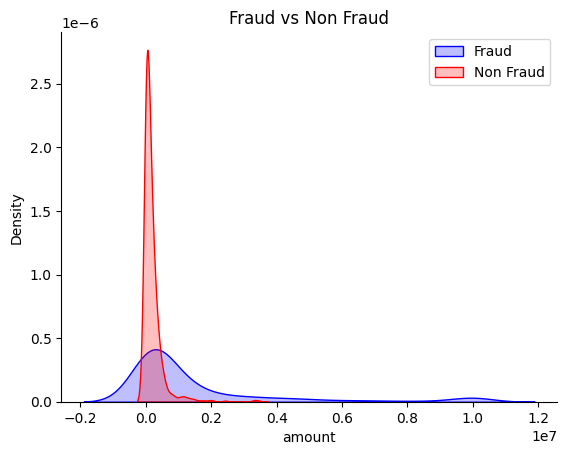

In [ ]:
#3 사기거래와 사기거래가 아닌 거래의 amount의 분포를 비교하시오.(※ isFraud가 1인 데이터 1000개를 Sampling하고 isFraud가 0인 데이터를 1000개를 Sampling하여 시각화 할 것)

import seaborn as sns

# isFraud가 1인 데이터 1000개 샘플링
fraud_sample = df2[df2['isFraud'] == 1].sample(n=1000)
# isFraud가 0인 데이터 1000개 샘플링
nonfraud_sample = df2[df2['isFraud'] == 0].sample(n=1000)

p1 = sns.kdeplot(fraud_sample['amount'], shade = True, color="Blue", label="Fraud")
p2 = sns.kdeplot(nonfraud_sample['amount'], shade = True, color="Red", label="Non Fraud")
plt.title("Fraud vs Non Fraud")
plt.legend(loc='upper right')

sns.despine() # Grid 의 위쪽, 오른쪽 선을 없에줌.

### Question 03

```
사기거래와 정상거래의 특성을 자유롭게 추가 EDA분석 하시오.
```


## **🔒 [게임] 문제**
---
* **제시된 게임 플레이 데이터(Non Time-Series)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|ID |ID|
|groupId |매치 내에서 그룹을 식별하는 ID|
|matchId |매치를 식별하는 ID|
|assists |이 플레이어가 공격하여 팀원이 죽인 적 플레이어의 수|
|boosts |사용한 부스트 아이템의 수|
|damageDealt |총 가한 피해량|
|DBNOs |적 플레이어를 다운시킨 횟수|
|headshotKills |헤드샷킬수|
|heals |heal 아이템 사용횟수|
|killPlace |매치 내 순위(적 플레이어를 죽인 횟수에 따른)|
|killPoints |적제압포인트|
|kills |적 제압횟수|
|killStreaks |짧은 시간 내에 적 플레이어를 죽인 최대 횟수|
|longestKill |적을 죽은시점에서 나와 죽은적의 거리(다운 시킨 후 차량으로 이동한 경우 큰 데이터가 발생할 수 있음|
|maxPlace |최악의 순위|
|numGroups |그룹넘버|
|revives |팀원을 부활시킨 횟수|
|rideDistance |이동수단 타고 이동거리|
|roadKills |차량 내에서 이루어진 적 제압횟수|
|swimDistance|수영한거리|
|teamKills |같은 팀원을 제압한 횟수|
|vehicleDestroys|자동차 파괴횟수|
|walkDistance|도보이동거리|
|weaponsAcquired|무기 획득횟수|
|winPoints|승점|
|winPlacePerc|승률|


In [ ]:
import pandas as pd
df3 = pd.read_csv('example_3.csv')
df3.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,24,0,0,5,247.30,2,0,4,...,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,1,440875,1,1,0,37.65,1,1,0,...,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,2,878242,2,0,1,93.73,1,0,2,...,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,3,1319841,3,0,0,95.88,0,0,0,...,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,4,1757883,4,0,1,0.00,0,0,1,...,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

In [ ]:
#1 Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력
df3.shape

(6225249, 27)

In [ ]:
#2 Data type 확인 → 각 Column별 Data Type 출력
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225249 entries, 0 to 6225248
Data columns (total 27 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   Id               int64  
 2   groupId          int64  
 3   matchId          int64  
 4   assists          int64  
 5   boosts           int64  
 6   damageDealt      float64
 7   DBNOs            int64  
 8   headshotKills    int64  
 9   heals            int64  
 10  killPlace        int64  
 11  killPoints       int64  
 12  kills            int64  
 13  killStreaks      int64  
 14  longestKill      float64
 15  maxPlace         int64  
 16  numGroups        int64  
 17  revives          int64  
 18  rideDistance     float64
 19  roadKills        int64  
 20  swimDistance     float64
 21  teamKills        int64  
 22  vehicleDestroys  int64  
 23  walkDistance     float64
 24  weaponsAcquired  int64  
 25  winPoints        int64  
 26  winPlacePerc     float64
dtypes: float64(6

In [ ]:
#3 Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
df3.isnull().sum()

Unnamed: 0               0
Id                       0
groupId                  0
matchId                  0
assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
killPoints               0
kills                    0
killStreaks              0
longestKill              0
maxPlace                 0
numGroups                0
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPoints                0
winPlacePerc       1867913
dtype: int64

### Question 02

```
다음 가설들을 데이터 분석을 통해 검증하시오.

[가설]
Without moving & WeaponsAcquired - analyze
 : 이동 없이 무기를 획득한 버그 유저가 존재할까?

  (1) _totalDistance가 하위 10%인 Data set을 만드시오.
  (※ '_totalDistance' = 'rideDistance' + 'walkDistance' + 'swimDistance')

  (2) 1번에서 만든 Data set에서 weaponsAcquired가 상위 1%인 버그의심 유저 수를 출력하시오.

```

In [ ]:
#1 _totalDistance가 하위 10%인 Data set을 만드시오.

#_totalDistance 컬럼 추가하기
df3['_totalDistance'] = df3['rideDistance'] + df3['walkDistance'] + df3['swimDistance']

#_totalDistance가 하위 10%에 해당하는 값 구하기
bottom10 = df3['_totalDistance'].quantile(0.1)

#_totalDistance가 하위 10%인 데이터셋 만들기
df3_bottom10 = df3[df3['_totalDistance'] <= bottom10]
df3_bottom10


,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance
3,3,3,1319841,3,0,0,95.88,0,0,0,...,0.0,0,0.0,0,0,21.490,1,1489,0.1146,21.490
44,44,44,1540626,44,0,0,0.00,0,0,0,...,0.0,0,0.0,0,0,12.430,1,1470,0.1064,12.430
68,68,68,2564268,68,0,0,0.00,0,0,0,...,0.0,0,0.0,0,0,11.880,0,1489,0.1111,11.880
77,77,77,2604077,77,0,0,0.00,0,0,0,...,0.0,0,0.0,0,0,6.322,1,1438,0.0000,6.322
85,85,85,2638861,85,0,0,85.41,0,0,0,...,0.0,0,0.0,0,0,36.190,2,1465,0.0440,36.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6225220,1867884,6225220,2538456,67691,0,0,0.00,0,0,0,...,0.0,0,0.0,0,0,8.918,0,1500,NaN,8.918
6225222,1867886,6225222,2539467,67715,0,0,0.00,0,0,0,...,0.0,0,0.0,0,0,13.170,0,1513,NaN,13.170
6225225,1867889,6225225,2541514,67759,0,0,0.00,0,0,0,...,0.0,0,0.0,0,0,0.000,0,1452,NaN,0.000
6225231,1867895,6225231,2548569,67916,0,0,0.00,0,0,0,...,0.0,0,0.0,0,0,0.000,0,1378,NaN,0.000


In [ ]:
#2 1번에서 만든 Data set에서 weaponsAcquired가 상위 1%인 버그의심 유저 수를 출력하시오.

#_totalDistance가 하위 10%인 데이터셋에서 weaponsAcquired가 상위 1%에 해당하는 값 구하기
top1 = df3_bottom10['weaponsAcquired'].quantile(0.99)

#_totalDistance가 하위 10%인 데이터셋에서 weaponsAcquired가 상위 1%인 데이터셋 만들기
df3_top1 = df3_bottom10[df3_bottom10['weaponsAcquired'] >= top1]

#_totalDistance가 하위 10%인 데이터셋에서 weaponsAcquired가 상위 1%인 버그의심 유저 수 출력하기
print(f"버그의심 유저 수 : {df3_top1.shape[0]} 명")

버그의심 유저 수 : 15300 명


### Question 03

```
상위 가설 이외에 주어진 데이터를 활용하여 다른 Action을 하는 버그 유저들을 식별하시오.
```